Autor: Erick Rodríguez Martínez

Fecha: 20/Febrero/2023



# Machine Learning

## Session #3: Classifying digits with SVM

The aim of this session is to solve a real data problem using SVM implementation of scikit-learn. The problem is based on the <a href = https://en.wikipedia.org/wiki/MNIST_database>  MNIST database</a> of handwritten digits that can be loaded from <a href = http://mldata.org> mldata.org</a>.



# Importar librerias requeridas

In [279]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as pl
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_local
from skimage.filters import threshold_minimum

from scipy import ndimage
#!pip install imutils
#pip install mahotas
import imutils
import mahotas

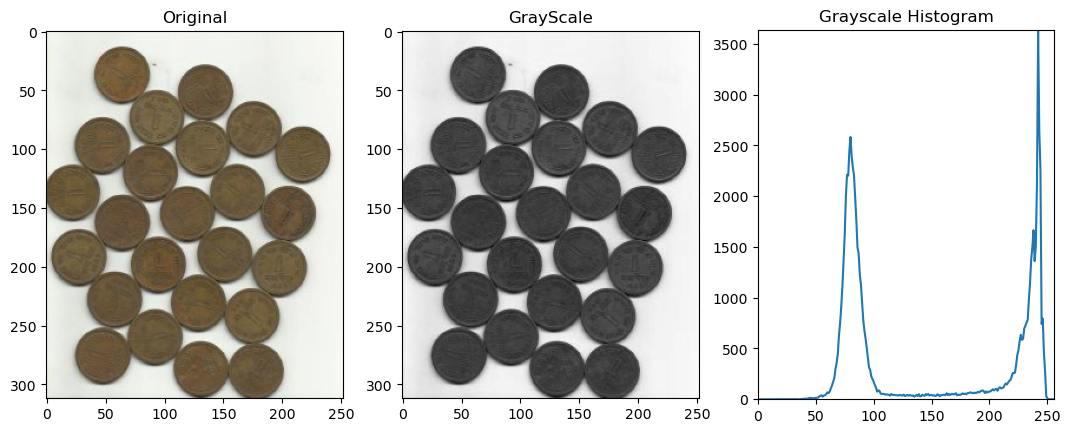

In [280]:
#imgBGR = cv2.imread('Pallet.jpeg')
imgBGR = cv2.imread('water_coins.jpg')
#imgBGR = cv2.imread('PinkAvocado.jpeg')
#imgBGR = cv2.imread('PinkAvocado2.jpeg')
#imgBGR = cv2.imread('Wharehouse.jpg')
#imgBGR = cv2.imread('Wharehouse2.jpg')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

plt.Figure()
pl.subplots_adjust(right=1.7)

pl.subplot(1, 3, 1)
pl.imshow(imgRGB)
plt.title('Original')

pl.subplot(1, 3, 2)
pl.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

pl.subplot(1, 3, 3)
hist = cv2.calcHist([imgGray], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist);

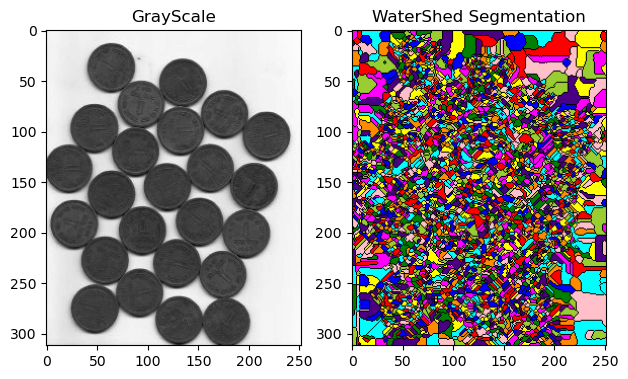

In [281]:
thWaterShed = watershed(imgGray, watershed_line=True)
wSSegmentation = label2rgb(thWaterShed)

plt.figure()
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

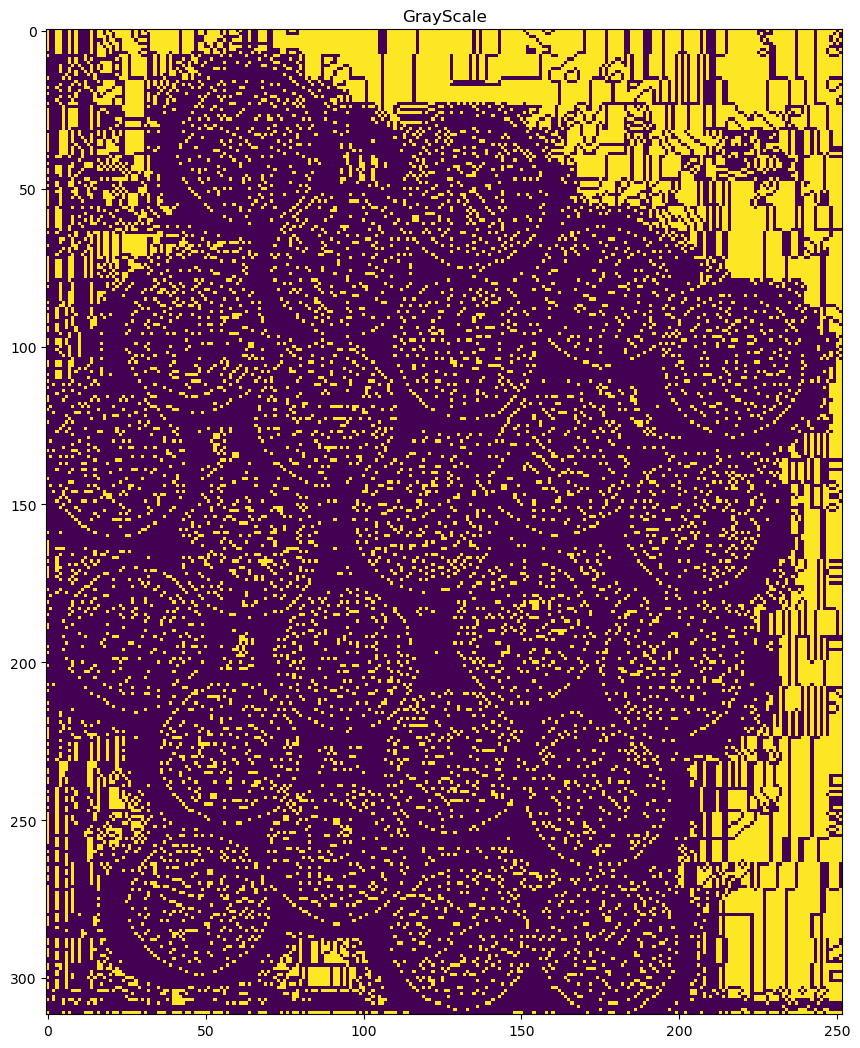

In [282]:
imgLocMin = mahotas.locmin((imgGray))
plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgLocMin, cmap='gray')
plt.title('GrayScale');

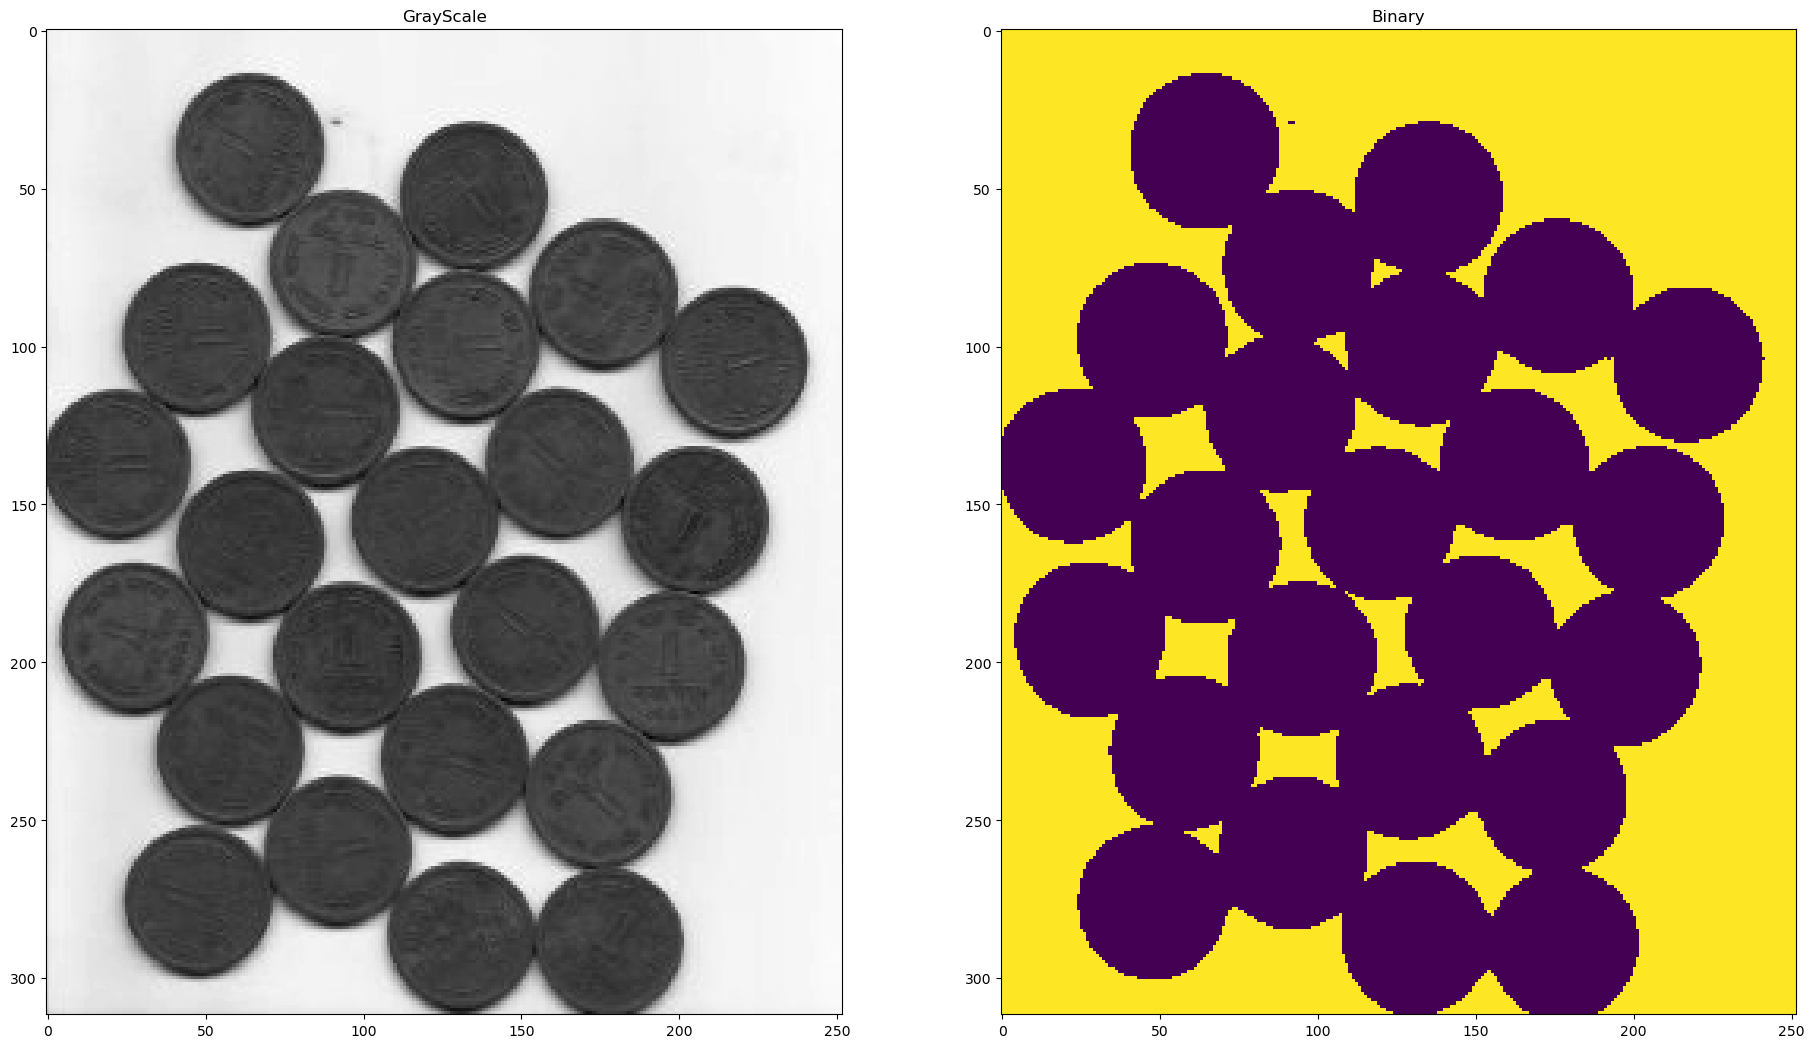

In [283]:
#localMaxima = peak_local_max(imgGray)
#localMinimum = threshold_minimum(imgGray)

otsuTh = threshold_otsu(imgGray)
binary = imgGray > otsuTh


plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1.7)
plt.subplots_adjust(right=1)

plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.title('Binary');



## Freedman-Diaconisrule:
$$
binWidth = \frac {2(q3 - q1)} {\sqrt[3] { n }} \\
bin = ceil (\frac {max(x) - min(x)} {binWidth}) \\
$$

# Second Time

In [284]:
#(ret, threshInv) = cv2.threshold(imgGray,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
#print(ret)
#print(threshInv)
#plt.figure(figsize=(20,50))
#plt.imshow(threshInv)

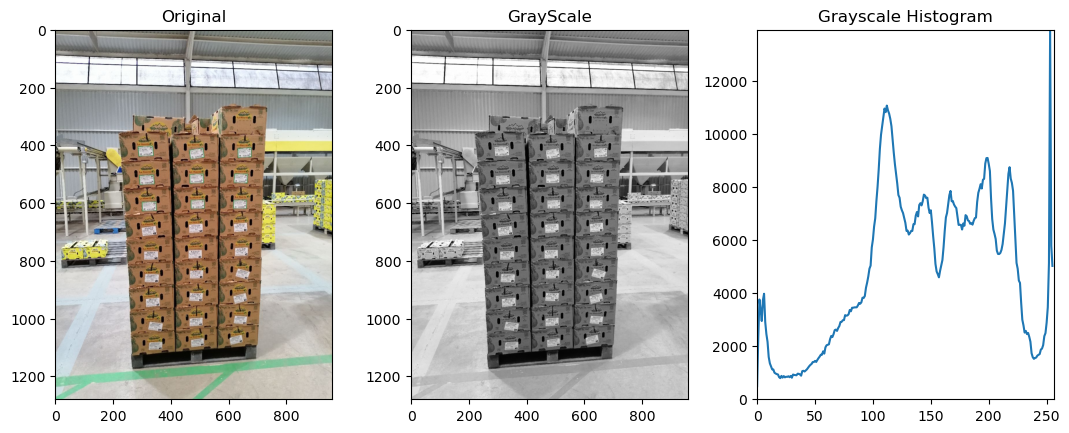

In [285]:
imgBGR = cv2.imread('water_coins.jpg')
imgBGR = cv2.imread('Pallet.jpeg')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

plt.Figure()
pl.subplots_adjust(right=1.7)

pl.subplot(1, 3, 1)
pl.imshow(imgRGB)
plt.title('Original')

pl.subplot(1, 3, 2)
pl.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

pl.subplot(1, 3, 3)
hist = cv2.calcHist([imgGray], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist);

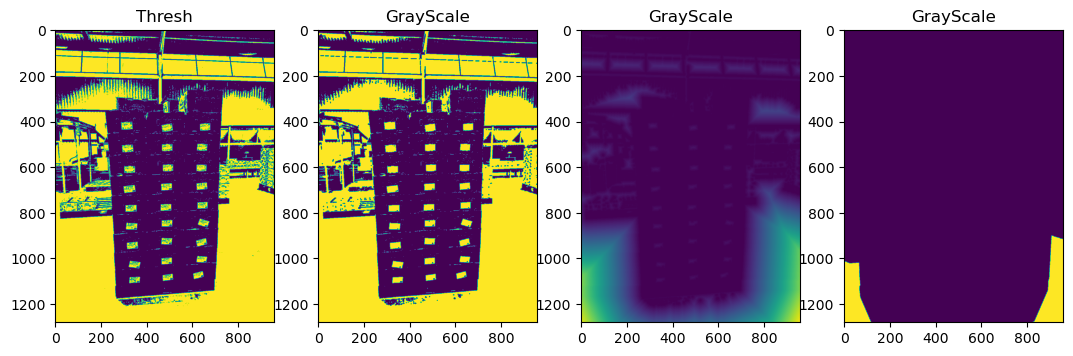

In [286]:
ret, thresh = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)

dist = cv2.distanceTransform(closing, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
#cv2.imshow('Distance Transform Image', dist)

ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)

plt.Figure(figsize=(20,50))
pl.subplots_adjust(right=1.7)

pl.subplot(1, 4, 1)
pl.imshow(thresh)
plt.title('Thresh')

pl.subplot(1, 4, 2)
pl.imshow(closing)
plt.title('GrayScale');

pl.subplot(1, 4, 3)
pl.imshow(dist)
plt.title('GrayScale');

pl.subplot(1, 4, 4)
pl.imshow(dist1)
plt.title('GrayScale');

# Third Time

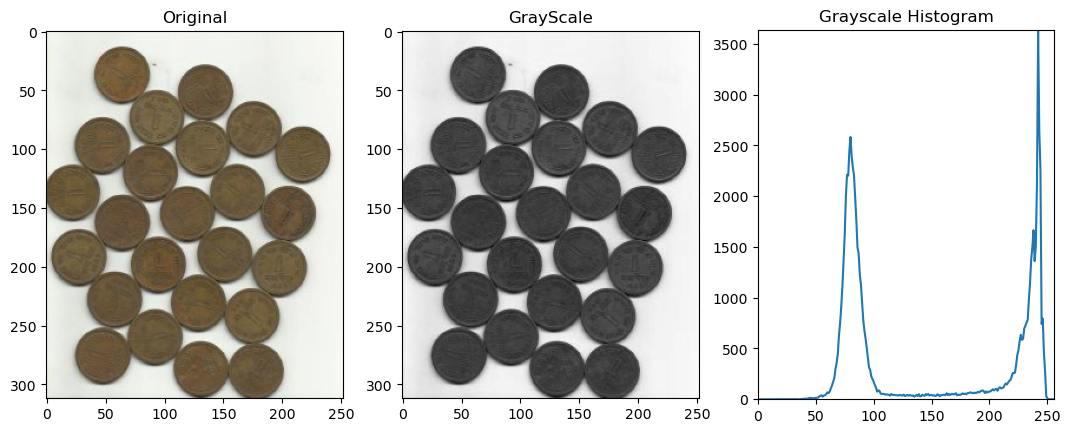

In [287]:
imgBGR = cv2.imread('water_coins.jpg')
#imgBGR = cv2.imread('Pallet.jpeg')
#imgBGR = cv2.imread('PinkAvocado.jpeg')
#imgBGR = cv2.imread('PinkAvocado2.jpeg')
#imgBGR = cv2.imread('Wharehouse.jpg')
#imgBGR = cv2.imread('Wharehouse2.jpg')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

plt.figure()
pl.subplots_adjust(right=1.7)

pl.subplot(1, 3, 1)
pl.imshow(imgRGB)
plt.title('Original')

pl.subplot(1, 3, 2)
pl.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

pl.subplot(1, 3, 3)
hist = cv2.calcHist([imgGray], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist);

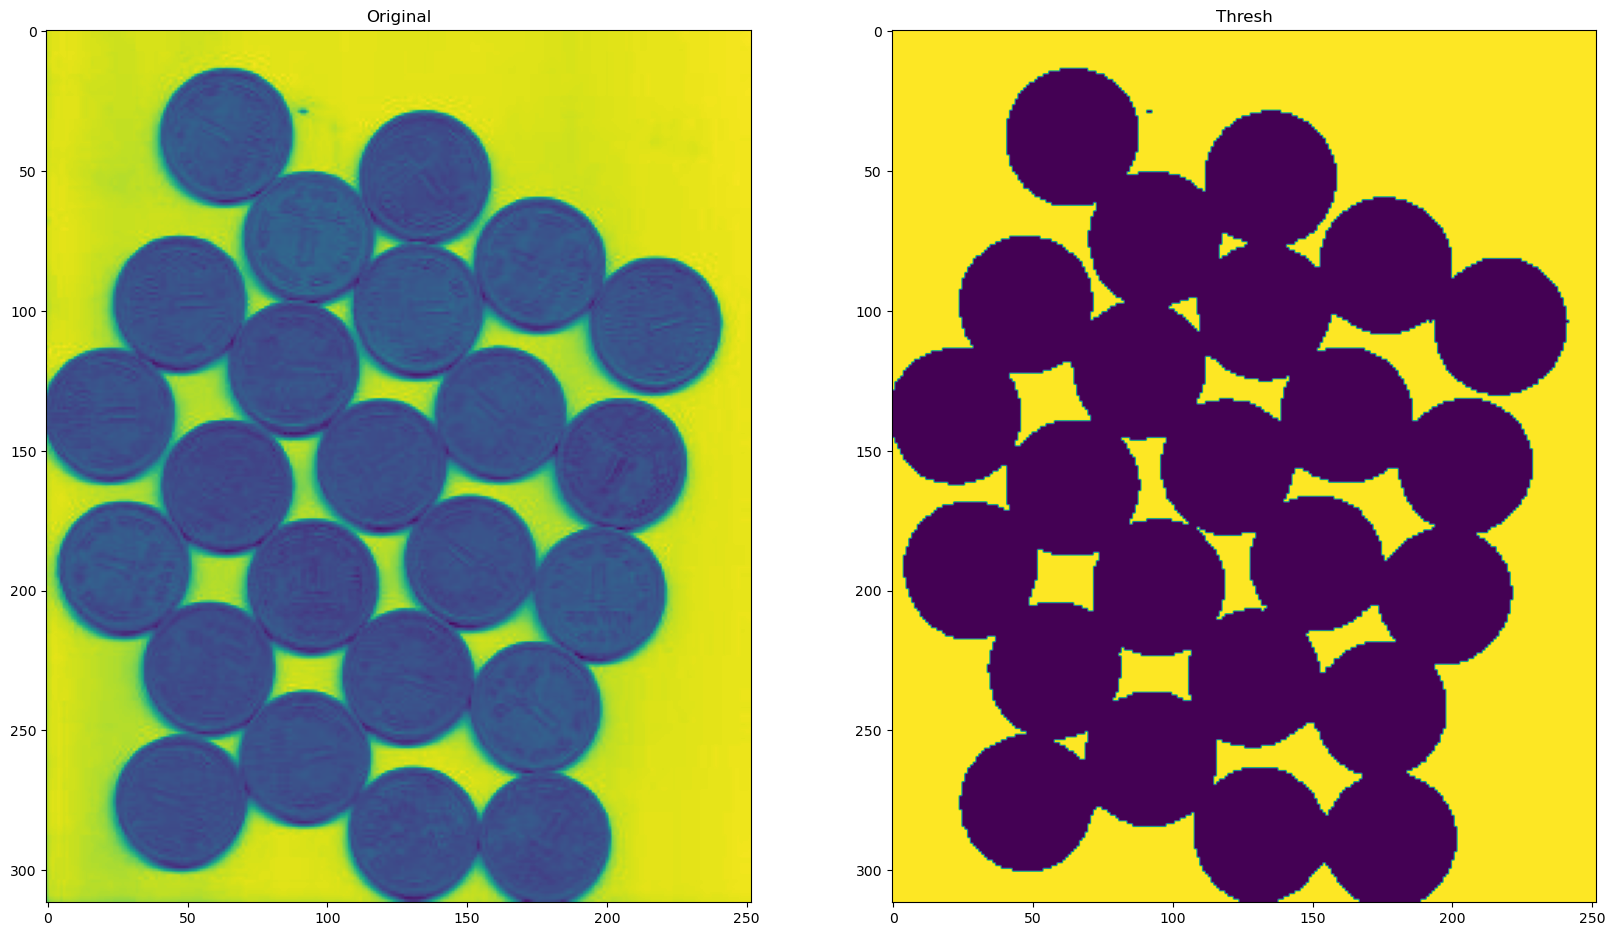

In [288]:
# Otsu's thresholding
thresh = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.figure(figsize=(20,50))
#pl.subplots_adjust(right=1.7)

pl.subplot(1, 2, 1)
pl.imshow(imgGray)
plt.title('Original')

pl.subplot(1, 2, 2)
pl.imshow(thresh)
plt.title('Thresh');

[INFO] 15 unique contours found


Text(0.5, 1.0, 'Original')

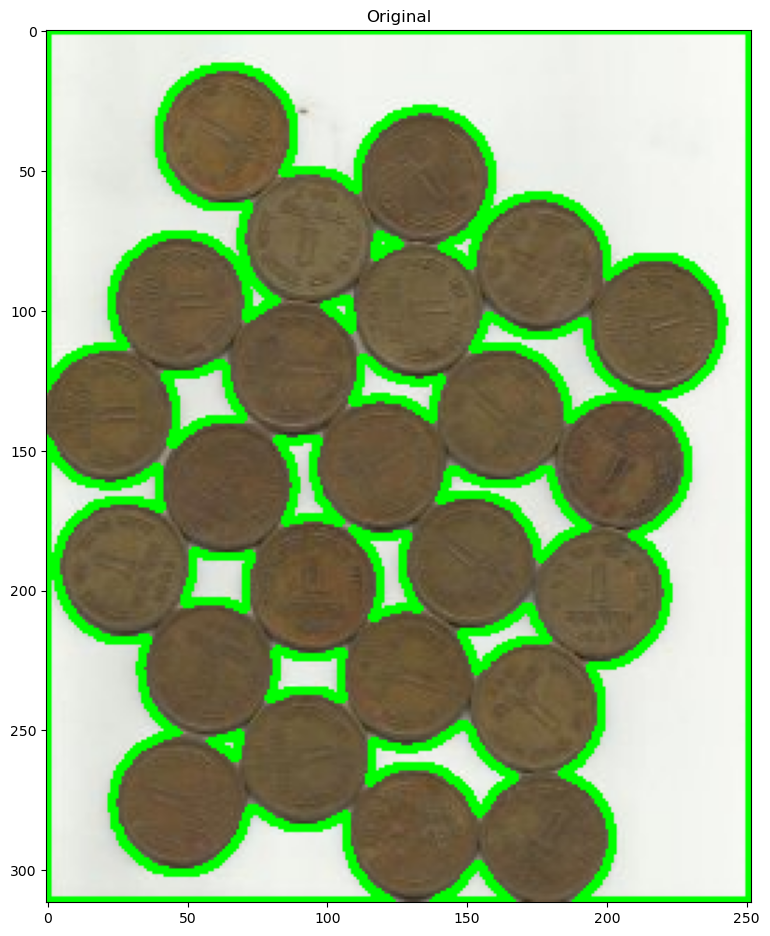

In [289]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

print("[INFO] {} unique contours found".format(len(cnts)))

# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the contour
	#((x, y), _) = cv2.minEnclosingCircle(c)
	#cv2.putText(imgRGB, "#{}".format(i + 1), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(imgRGB, [c], -1, (0, 255, 0), 2)
# show the output image

plt.figure(figsize=(20,50))
#pl.subplots_adjust(right=1.7)

pl.subplot(1, 2, 1)
pl.imshow(imgRGB)
plt.title('Original')


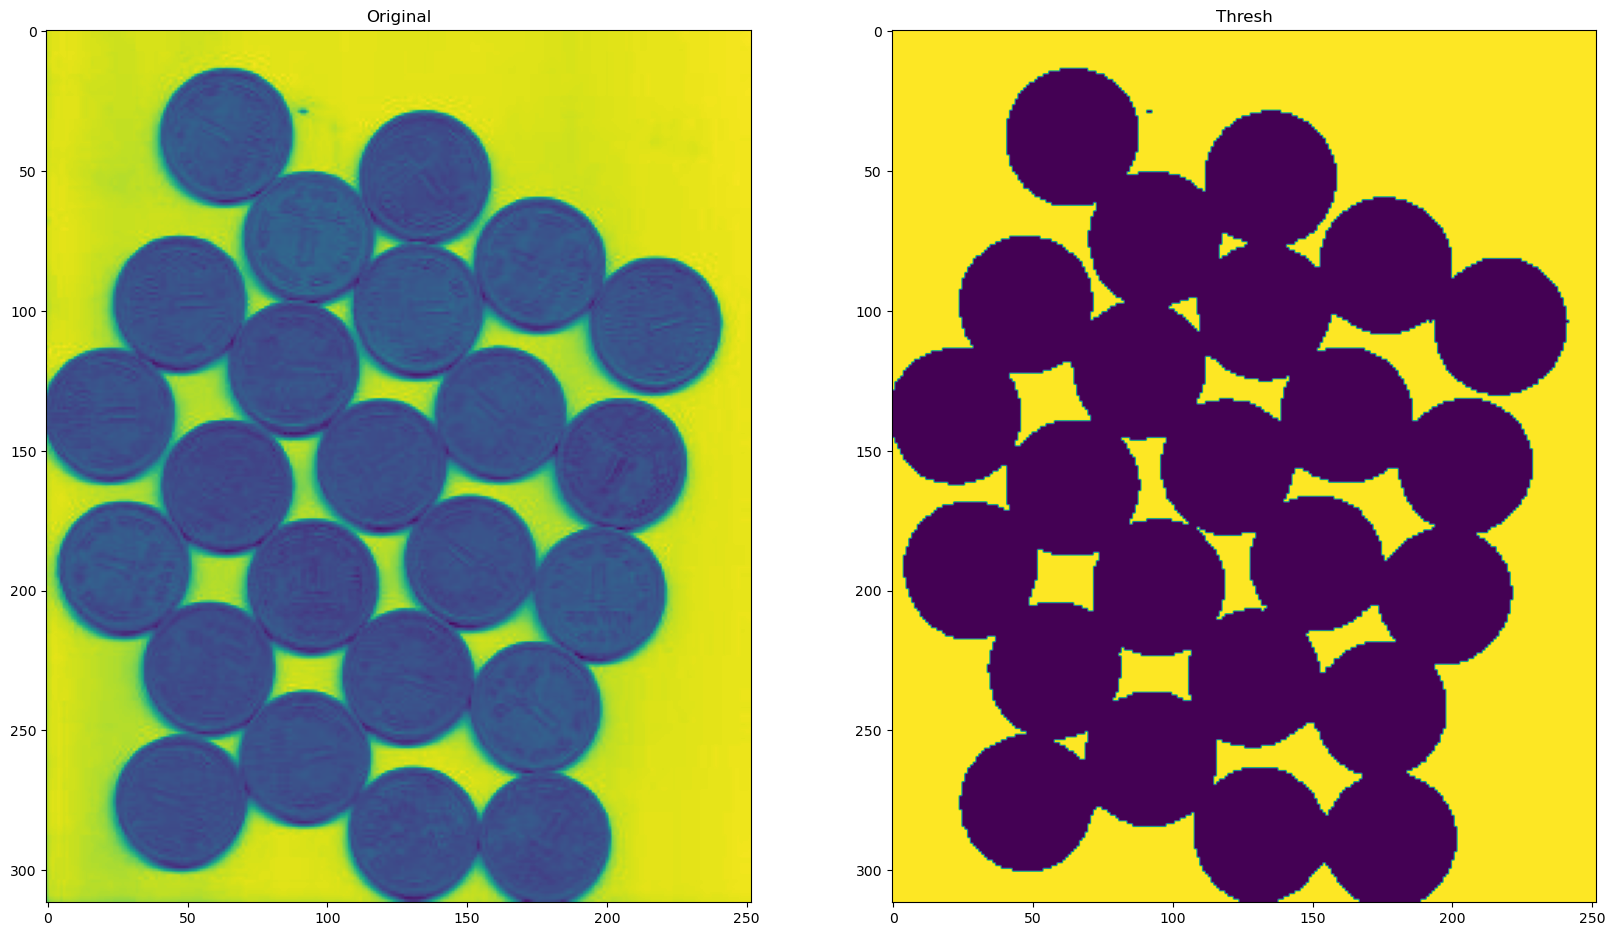

In [290]:
plt.figure(figsize=(20,50))
#pl.subplots_adjust(right=1.7)

pl.subplot(1, 2, 1)
pl.imshow(imgGray)
plt.title('Original')

pl.subplot(1, 2, 2)
pl.imshow(thresh)
plt.title('Thresh');

C:\Users\erodr\AppData\Local\Temp\ipykernel_30536\2007960719.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)


[INFO] 25 unique segments found


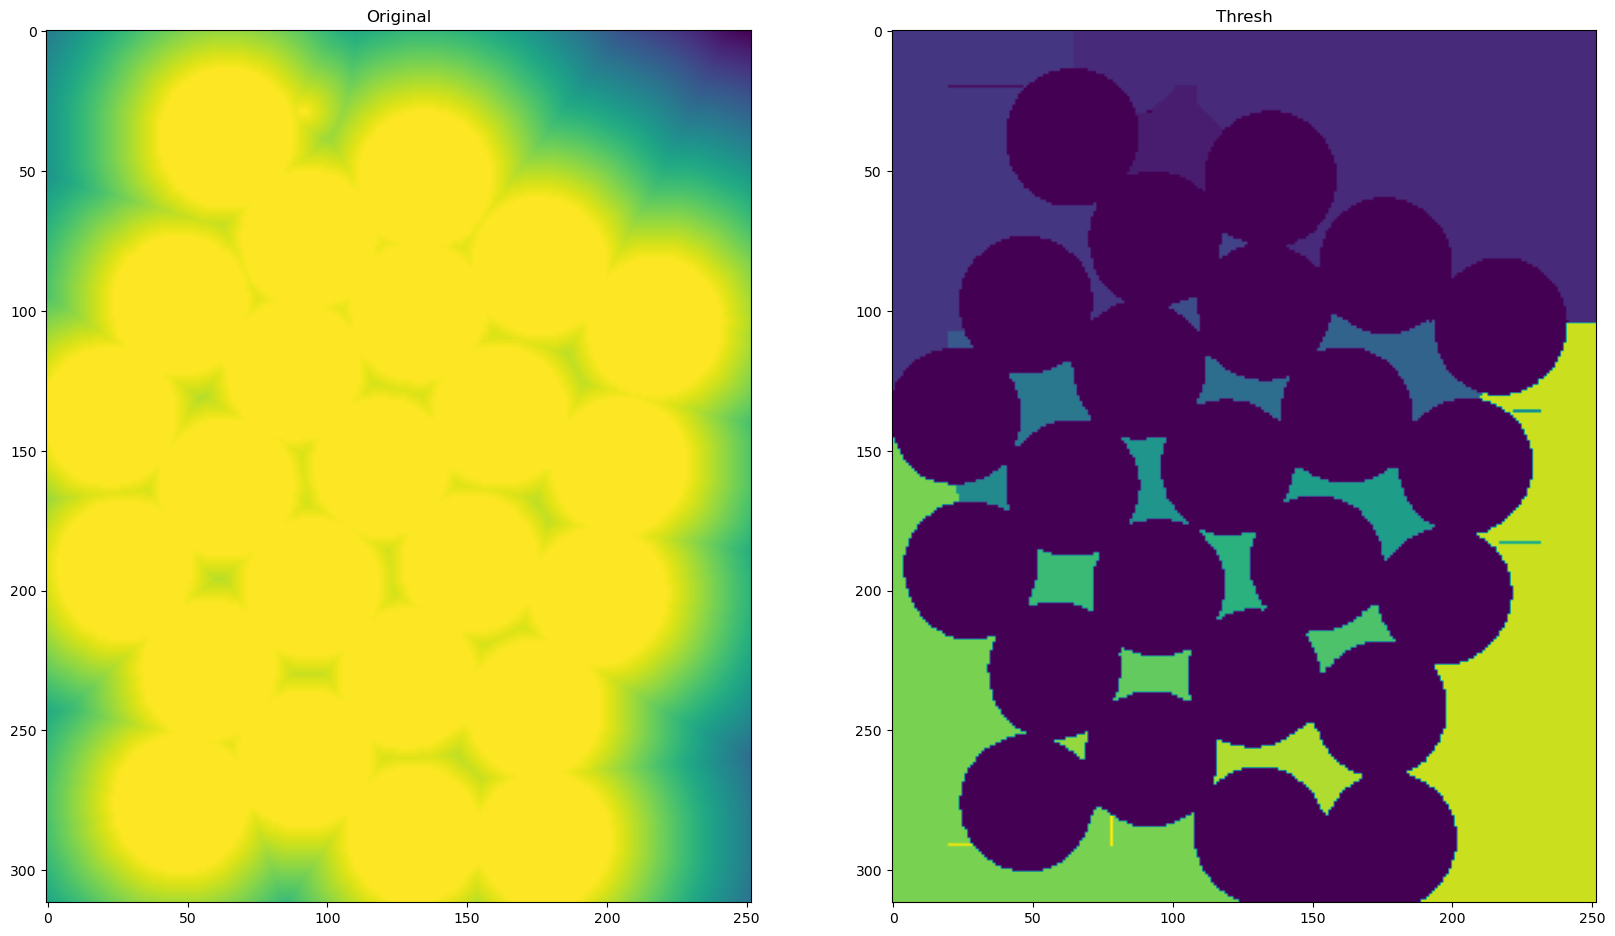

In [291]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

plt.figure(figsize=(20,50))
#pl.subplots_adjust(right=1.7)

pl.subplot(1, 2, 1)
pl.imshow(-D)
plt.title('Original')

pl.subplot(1, 2, 2)
pl.imshow(labels)
plt.title('Thresh');

Text(0.5, 1.0, 'Original')

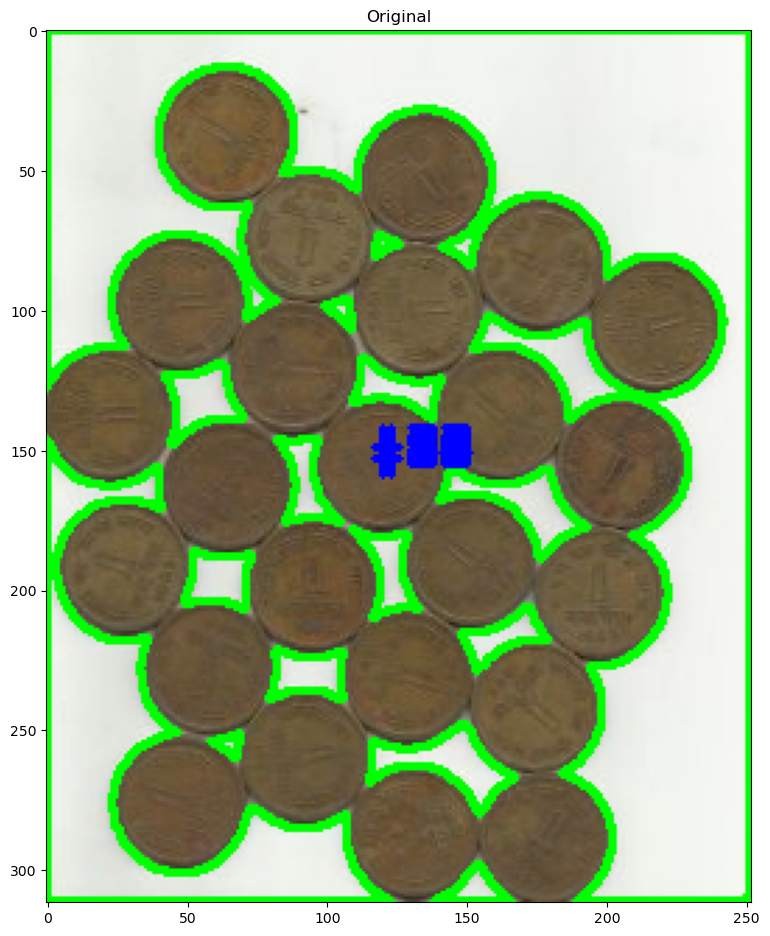

In [292]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(imgGray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(imgRGB, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(imgRGB, "#{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.figure(figsize=(20,50))
#pl.subplots_adjust(right=1.7)

pl.subplot(1, 2, 1)
pl.imshow(imgRGB)
plt.title('Original')
